In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\DM\\cereal.csv") 
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [4]:
df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)]=df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)].replace(-1,0)

# Tính các giá trị cơ bản

In [5]:
#Tính mean
col=df.columns.tolist()[3:]
mean_df = df[col].sum() / len(df)
#print(mean_df)

y = df.columns
def calculate_median(data):
    new_list = sorted(data)
    if len(new_list)%2:
      return new_list[len(new_list)//2]
    else:
      return (new_list[(len(new_list)/2)] + new_list[(len(new_list)/2)-1]) /2.0

#Tính median
median_df = []
col=df.columns.tolist()[3:]
for i in df.columns.tolist()[3:] : 
    median_df.append(calculate_median(df[i]))
#print(median_df)


#Tính phương sai
col=df.columns.tolist()[3:]
variance_df = []
for i in df.columns.tolist()[3:] : 
    variance_df.append(((df[i]-mean_df[i])**2).sum(axis=0) / (len(df)-1))
#print(variance_df)


#TÍnh độ lệch chuẩn
std_df = np.sqrt(variance_df)
#print(std_df)


#describe = ['mean' , 'std' , 'min' , 'max' , 'medium', 'variance' , 'std' , 'corr']
describe_df = pd.DataFrame({'mean' : mean_df ,'median' : median_df, 'variance': variance_df , 'std' : std_df  })
print(describe_df)

                mean      median     variance        std
calories  106.883117  110.000000   379.630895  19.484119
protein     2.545455    3.000000     1.198565   1.094790
fat         1.012987    1.000000     1.012987   1.006473
sodium    159.675325  180.000000  7027.853725  83.832295
fiber       2.151948    2.000000     5.680424   2.383364
carbo      14.610390   14.000000    17.911996   4.232257
sugars      6.935065    7.000000    19.561517   4.422840
potass     96.103896   90.000000  5076.725906  71.251147
vitamins   28.246753   25.000000   499.188312  22.342523
shelf       2.207792    2.000000     0.693096   0.832524
weight      1.029610    1.000000     0.022643   0.150477
cups        0.821039    0.750000     0.054157   0.232716
rating     42.665705   40.400208   197.326321  14.047289


# Tính tương quan

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,calories,1.0,0.0,0.5,0.3,-0.3,0.3,0.6,-0.1,0.3,0.1,0.7,0.1,-0.7
1,protein,0.0,1.0,0.2,-0.1,0.5,-0.1,-0.3,0.5,0.0,0.1,0.2,-0.2,0.5
2,fat,0.5,0.2,1.0,-0.0,0.0,-0.3,0.3,0.2,-0.0,0.3,0.2,-0.2,-0.4
3,sodium,0.3,-0.1,-0.0,1.0,-0.1,0.4,0.1,-0.0,0.4,-0.1,0.3,0.1,-0.4
4,fiber,-0.3,0.5,0.0,-0.1,1.0,-0.4,-0.1,0.9,-0.0,0.3,0.2,-0.5,0.6
5,carbo,0.3,-0.1,-0.3,0.4,-0.4,1.0,-0.4,-0.4,0.3,-0.1,0.1,0.4,0.1
6,sugars,0.6,-0.3,0.3,0.1,-0.1,-0.4,1.0,0.0,0.1,0.1,0.5,-0.0,-0.8
7,potass,-0.1,0.5,0.2,-0.0,0.9,-0.4,0.0,1.0,0.0,0.4,0.4,-0.5,0.4
8,vitamins,0.3,0.0,-0.0,0.4,-0.0,0.3,0.1,0.0,1.0,0.3,0.3,0.1,-0.2
9,shelf,0.1,0.1,0.3,-0.1,0.3,-0.1,0.1,0.4,0.3,1.0,0.2,-0.3,0.0


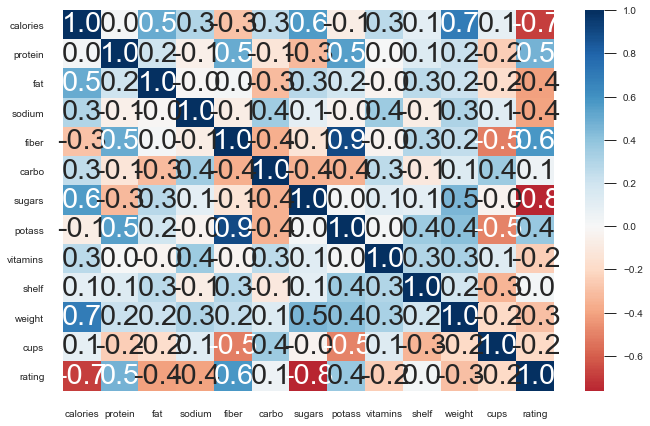

In [6]:
def vitri(a,b):
    for i in range(len(a)):
        if b==a[i] :
            vitrii=i
    return vitrii


#Tinh r tương quan
col=df.columns.tolist()[3:]
r = []
for i in col:
    cov = []*len(col)
    for j in col:
        cov.append(((df[i] - mean_df[i])*(df[j] - mean_df[j])).sum(axis=0)/(len(df) - 1))
    tam = vitri(col,i)
    for k in range(len(col)):
        r.append(round(cov[k]/(std_df[tam]*std_df[k]),1))
r_df = [[]]
for i in range(len(col)):
    r_df[0].append(r[0:13])
    del r[0:13]
df_r1 = pd.DataFrame({'name' : col , 'calories' : r_df[0][0] ,'protein' : r_df[0][1] , 'fat' : r_df[0][2] ,'sodium' : r_df[0][3] ,'fiber' : r_df[0][4] ,'carbo' : r_df[0][5] , 'sugars' : r_df[0][6] ,'potass' : r_df[0][7] , 'vitamins' : r_df[0][8] ,'shelf' : r_df[0][9] , 'weight' : r_df[0][10] ,'cups' : r_df[0][11] ,'rating': r_df[0][12] }) 
  
## Tương quan
sns.set(context='poster', style='dark', rc={'figure.facecolor':'white'}, font_scale=1.2)
plt.style.use('seaborn-notebook')
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
df_r1.head(13)

fiber và potass có mối tương quan thuận mạnh nhất
Lượng calo có mối tương quan thuận đáng chú ý với trọng lượng (weight) , đường (sugar ) và chất béo (fat), có ý nghĩa về mặt dinh dưỡng
Calo và sugar có mối tương quan nghịch với rating



Đây là một biến phân loại cho biết mức kệ nơi ngũ cốc được trưng bày.

==>> nó không liên quan đến thành phần dinh dưỡng của ngũ cốc.

Weight , cup đại diện cho khối lượng và thể tích (tương ứng) của một khẩu phần ngũ cốc.

Các loại ngũ cốc khác nhau có mật độ khác nhau.
=> không liên quan đến thành phần dinh dưỡng của ngũ cốc.
Dựa vào tương quan và nhận định trên => loại shelf, weight, cup

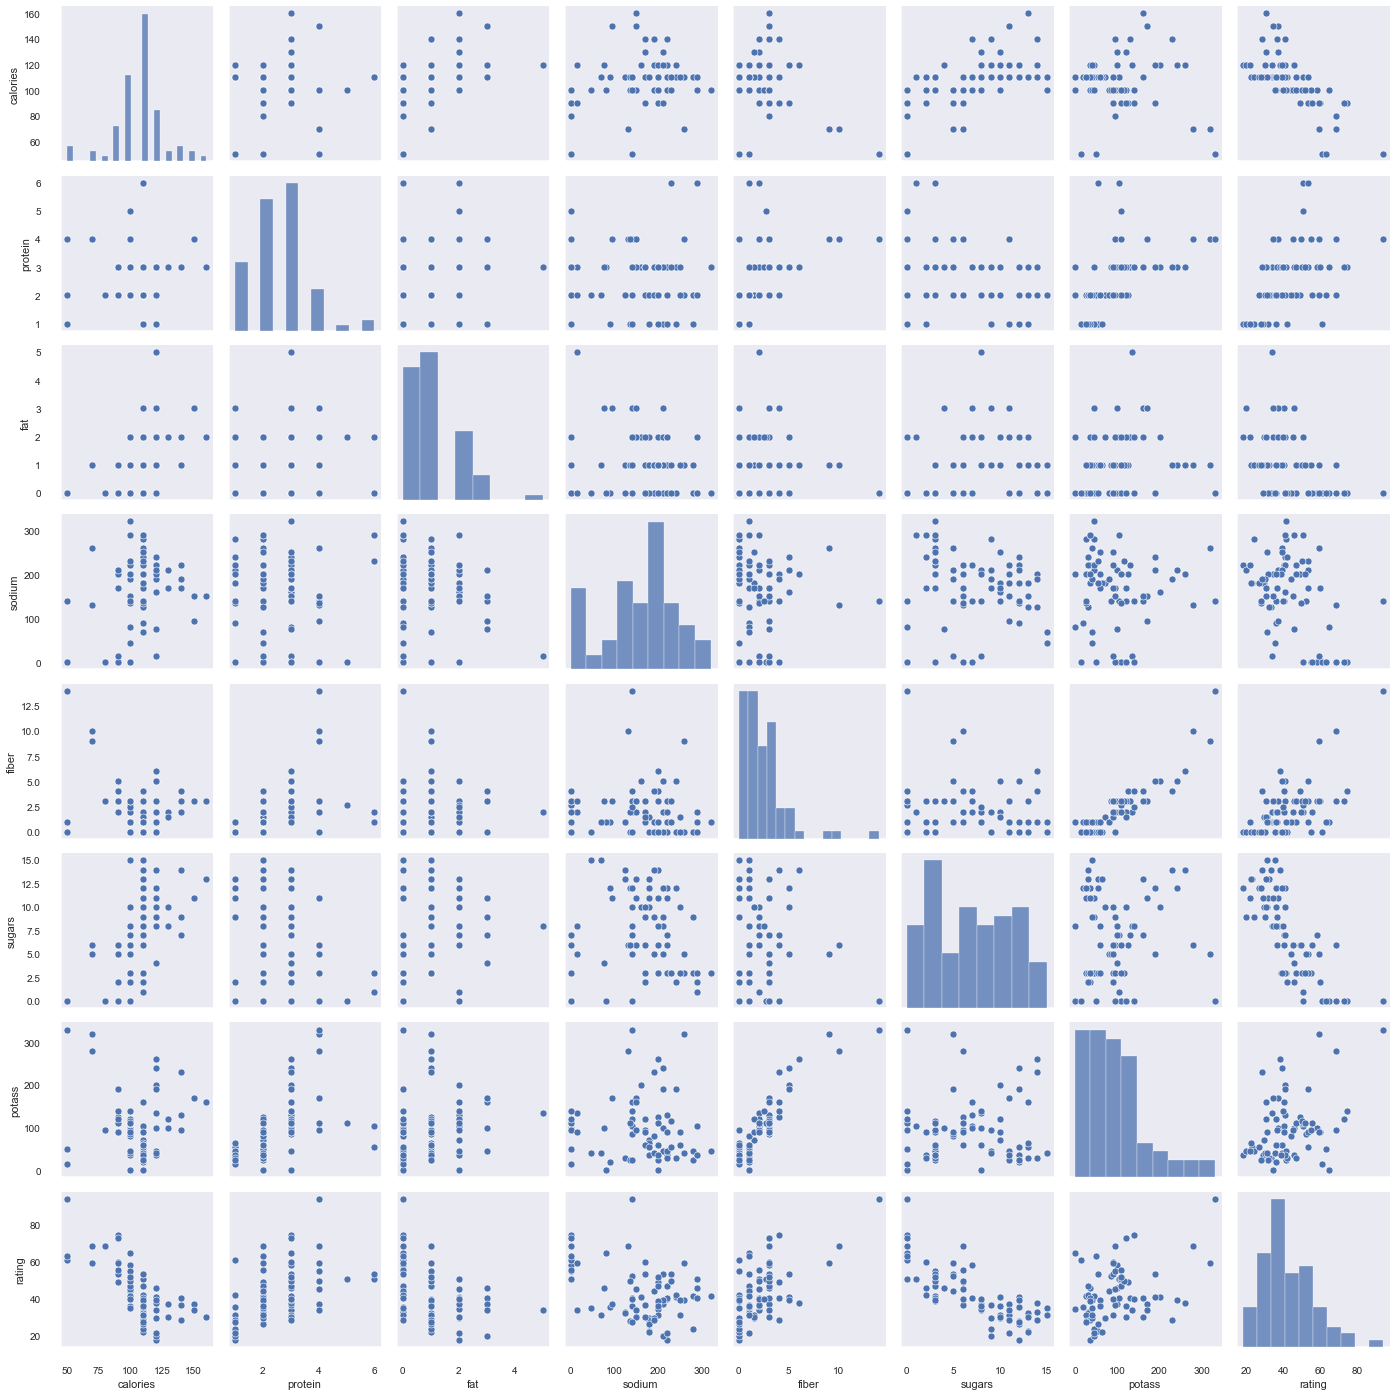

In [7]:
cols=['calories','protein','fat','sodium','fiber','sugars','potass','rating']
sns.pairplot(data=df[cols])

calories,sugar có tương quan khá cao với rating, nhận thấy có quan hệ tuyến tính với rating /
filber và potass có tương quan rất cao với nhau, thấy rõ quan hệ tuyến tính => xóa 1 trong 2 ( xóa potass )

# Nomarliztion

In [8]:
col=df.columns.tolist()[3:]
for i in col :
    df[i]=(df[i] - df[i].mean()) / df[i].std()
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317,0.951573,-0.196777,-2.110034,1.832188
1,100% Natural Bran,Q,C,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260,0.951573,-0.196777,0.769010,-0.618057
2,All-Bran,K,C,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317,0.951573,-0.196777,-2.110034,1.193099
3,All-Bran with Extra Fiber,K,C,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317,0.951573,-0.196777,-1.379530,3.633385
4,Almond Delight,R,C,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317,0.951573,-0.196777,-0.305260,-0.589499


# Loại bỏ các biến

In [9]:
df.drop(["mfr","type","name","shelf","cups","weight" ],axis=1,inplace=True)
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317,1.832188
1,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260,-0.618057
2,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317,1.193099
3,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317,3.633385
4,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317,-0.589499


# Hồi quy

In [10]:
# Tính X*X' :
def tinhX_X(a) :
    X_X_tam = []
    for i in range(len(a)) :
        tam = 0
        for j in range(len(a)):
            tam = (a[i]*a[j]).sum()
            X_X_tam.append(tam)
    X_X=[]
    for i in range(len(a)):
        X_X.append(X_X_tam[0:len(a)])
        del X_X_tam[0:len(a)]
    return X_X



#mt_chuyenvi
def mt_chuyenvi(mt):
    chuyenvi = []
    for i in range(len(mt[0])):
        tam = []
        for j in range(len(mt)):
            tam.append(mt[j][i])
        chuyenvi.append(tam)
    return chuyenvi



# Tìm ma trận con
def mt_con(mt,row,col) :
    lvl = len(mt)
    smt=[]
    for j in range(len(mt)):
        if(j!=row) : 
            tam = []
            for k in range(len(mt)):
                if(k!=col): 
                    tam.append(mt[j][k])
            smt.append(tam)
    return smt



#Tìm det của X_X
def det(mt) :
    dt = 0
    if len(mt) == 1 :
        dt = mt[0][0]
    else :
        for i in range(len(mt)):
            smt = mt_con(mt,0,i)
            dt += mt[0][i]*pow(-1,i)*det(smt)
    return dt


#nhân hai ma trận
def tichA_B(a,b) :
    a_b =[]
    a_b_tam = []
    len_b=len(mt_chuyenvi(b))
    for i in range(len(a)) :     
        a_b_tam = []
        for j in range(len_b):
        
            tam = 0
            for k in range(len(b)):
                tam = tam + (a[i][k]*b[k][j])
            a_b_tam.append(tam)
        a_b.append(a_b_tam)
    return a_b
def beta(train_a,train_b):
    X_X = tinhX_X(train_a)
    det_X_X = det(X_X)
    #matranphuhop :
    P = []
    for i in range(len(X_X)):
            tam_X_X_mt_phuhop = []
            for j in range(len(X_X)):
                tam = 0
                tam = pow(-1,i+j)*det(mt_con(X_X,i,j))
                tam_X_X_mt_phuhop.append(tam)
            P.append(tam_X_X_mt_phuhop)
            X_X_nghichdao = []
    for i in range(len(P)):
        tam = 0
        tam_X_X_nghichdao =[]
        for j in range(len(P)):
            tam = (1/det_X_X)*P[j][i]
            tam_X_X_nghichdao.append(tam)
        X_X_nghichdao.append(tam_X_X_nghichdao)
    X_X_nghichdao_X = tichA_B(X_X_nghichdao,train_X)
    B = 0
    B = tichA_B(X_X_nghichdao_X,mt_chuyenvi(train_b))
    return B
def pred(Beta):
    pred_Y =[]
    for i in range(len_test):
        k = i + len_train
        pred_Y_tam = 0
        for j in range(len(Beta)):    
            pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
        pred_Y.append(pred_Y_tam)

# Chia dữ liệu

In [11]:
# import random
# n=random.sample(range(len(df)), len(df))
# df['random'] = ''
# for i in range(len(df)) :
#     df.random[i] = n[i]
# df = df.sort_values('random', ascending=True)
# df = df.reset_index()
# df.drop(["random","index"],axis=1,inplace=True)


# # Gán độ dài của train và test
# len_train = round(len(df) * 0.8)
# len_test =  len(df) - len_train 
# print(len_train)

# #Chia dữ liệu

# test_Y = []
# train_Y=[]
# train_Y.append(df.rating[:len_train])
# test_Y.append(df.rating[len_train:])

# df.drop(["rating"], axis = 1 , inplace = True)


In [12]:
# #Tính các biến cần thiết
# mean_test_Y = 0
# mean_test_Y = test_Y[0].mean()
# print(mean_test_Y)
# df.head()

# Kiểm tra quan hệ của các biến X đối với Y qua F 

In [13]:
# col = df.columns.tolist()
# for i in col:
#     df['mot'] = 1
#     train_X = []
#     train_X.append(df.mot[:len_train])


#     test_X = []
#     test_X.append(df.mot[len_train:])
#     df.drop(["mot"], axis = 1 , inplace = True)
    
#     train_X.append(df[i][:len_train])
#     test_X.append(df[i][len_train:])
#     mean_test_X = 0
#     mean_test_X = df[i][len_train:].mean()
    
#     Beta = beta(train_X,train_Y)
#     print('model ',i)
#     print('B: ',Beta)
#     pred_Y =[]
#     for m in range(len_test):
#         k = m + len_train
#         pred_Y_tam = 0
#         for n in range(len(Beta)):    
#             pred_Y_tam = pred_Y_tam + Beta[n][0]*test_X[n][k]
#         pred_Y.append(pred_Y_tam)
   
#     #Phần dư SSE :
    
#     SSE = pow((test_Y[0]-pred_Y),2).sum()
    
#     #Độ lệch tổng TSS
    
#     SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
#     #Độ lệch được lý giải SSR
#     SSR = 0
#     for m in range(len(pred_Y)):
#         SSR = SSR + pow((pred_Y[m] - mean_test_Y),2)
#     #Tính R
#     R = ((test_Y[0] - pred_Y).sum())/len_test
#     print("R : ",R)
#     #Tính R_square
#     R_square = round(1 - (SSE/SST),2)
#     print('R_square : ',R_square)
    
#     #Tính R_square_adj
#     R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
#     print('R_square_adj: ',R_square_adj)
        
#     #Kiểm định F :
#     MSE = SSE / (len_train - len(Beta) - 2)
#     MSR = SSR / (len(Beta) - 1 )
#     F = MSR / MSE
    
#     #Kiểm định t :
#     s = math.sqrt(SSE/(len_train - 2))
#     mau = 0
#     for n in range(62,77):
#         mau = mau + pow(test_X[1][n]-mean_test_X,2)
#     s_b = s / math.sqrt(mau)
#     t = Beta[1][0]/s_b
#     #print('t :',t)
#     print('F : ',F)
#     print('_______________________________________________________________________________________________________________________________')


F < F tra bảng (4.0012)/
tương quan giữa carbo và rating thấp => loại carbo khỏi mô hình


In [14]:
# df.drop(["carbo"],axis=1,inplace=True)
# df['mot'] = 1
# train_X = []
# train_X.append(df.mot[:len_train])


# test_X = []
# test_X.append(df.mot[len_train:])



# df.drop(["mot"], axis = 1 , inplace = True)

# #Tính các biến cần thiết

# mean_test_Y = 0
# mean_test_Y = test_Y[0].mean()
# print(mean_test_Y)
# df.head()

# Kiểm qua các mô hình

In [15]:
# col = df.columns.tolist()
# for i in col:
#     train_X.append(df[i][:len_train])
#     test_X.append(df[i][len_train:])
#     Beta = beta(train_X,train_Y)
#     print('model ',i)
#     print('B: ',Beta)
#     pred_Y =[]
#     for m in range(len_test):
#         k = m + len_train
#         pred_Y_tam = 0
#         for n in range(len(Beta)):    
#             pred_Y_tam = pred_Y_tam + Beta[n][0]*test_X[n][k]
#         pred_Y.append(pred_Y_tam)
   
#     #Phần dư SSE :
    
#     SSE = pow((test_Y[0]-pred_Y),2).sum()
    
#     #Độ lệch tổng TSS
    
#     SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
#     #Độ lệch được lý giải SSR
#     SSR = 0
#     for m in range(len(pred_Y)):
#         SSR = SSR + pow((pred_Y[m] - mean_test_Y),2)
#     #Tính R
#     R = ((test_Y[0] - pred_Y).sum())/len_test
#     print("R : ",R)
#     #Tính R_square
#     R_square = round(1 - (SSE/SST),2)
#     print('R_square : ',R_square)
    
#     #Tính R_square_adj
#     R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
#     print('R_square_adj: ',R_square_adj)
    
#     #Tính AIC
#     AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
#     print('AIC : ',AIC)
    
#     #Tính BIC
#     BIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + math.log(len_train)*(len(Beta))
#     print('BIC : ',BIC)
    
#     #Kiểm định F :
#     MSE = SSE / (len_train - len(Beta) - 2)
#     MSR = SSR / (len(Beta) - 1 )
#     F = MSR / MSE
#     print('F : ',F)
    
    
#     #Kiểm định F change:
#     if i == col[0] :
#         F_change = F
#         SSE_t = SSE
#     else :
#         F_change = (SSE_t - SSE)/MSE
#         SSE_t = SSE
    
#     print('F_change: ',F_change)
#     print(SSE_t)
#     print('_______________________________________________________________________________________________________________________________')


In [16]:
# df.drop(["fat"], axis = 1 , inplace = True)
# # Gán độ dài của train và test
# len_train = round(len(df) * 0.8)
# len_test =  len(df) - len_train 
# print(len_train)
# df['mot'] = 1
# #Chia dữ liệu
# train_X = []
# train_X.append(df.mot[:len_train])


# test_X = []
# test_X.append(df.mot[len_train:])
# df.drop(["mot"], axis = 1 , inplace = True)
# #Tính các biến cần thiết
# mean_test_Y = test_Y[0].mean()
# print(mean_test_Y)
# df.head()
# col = df.columns.tolist()
# for i in col:
#     train_X.append(df[i][:len_train])
#     test_X.append(df[i][len_train:])
#     Beta = beta(train_X,train_Y)
#     print('model ',i)
#     print('B: ',Beta)
#     pred_Y =[]
#     for i in range(len_test):
#         k = i + len_train
#         pred_Y_tam = 0
#         for j in range(len(Beta)):    
#             pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
#         pred_Y.append(pred_Y_tam)
   
#     #Phần dư SSE :
#     SSE = 0
#     SSE = pow((test_Y[0]-pred_Y),2).sum()
    
#     #Độ lệch tổng SST
#     SST = 0
#     SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
#     #Độ lệch được lý giải SSR
#     SSR = 0
#     for i in range(len(pred_Y)):
#         SSR = SSR + pow((pred_Y[i] - mean_test_Y),2)
#     #Tính R
#     R = ((test_Y[0] - pred_Y).sum())/len_test
#     print("R : ",R)
#     #Tính R_square
#     R_square = round(1 - (SSE/SST),2)
#     print('R_square : ',R_square)
    
#     #Tính R_square_adj
#     R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
#     print('R_square_adj: ',R_square_adj)
    
#     #Tính AIC
#     AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
#     print('AIC : ',AIC)
#     #Tính BIC
#     BIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + math.log(len_train)*(len(Beta))
#     print('BIC : ',BIC)
     
#     #Kiểm định F change:
#     if i == col[0] :
#         F_change = F
#         SSE_t = SSE
#     else :
#         F_change = (SSE_t - SSE)/MSE
#         SSE_t = SSE
    
#     print('F_change: ',F_change)
   
#     print('_______________________________________________________________________________________________________________________________')

potass tương quan dương với rating như hệ số âm /
như nhận xét lúc trước thì loại potass ra khỏi mô hình

In [17]:
# df.drop(["potass"], axis = 1 , inplace = True)
# # Gán độ dài của train và test
# len_train = round(len(df) * 0.8)
# len_test =  len(df) - len_train 
# print(len_train)
# df['mot'] = 1
# #Chia dữ liệu
# train_X = []
# train_X.append(df.mot[:len_train])


# test_X = []
# test_X.append(df.mot[len_train:])
# df.drop(["mot"], axis = 1 , inplace = True)
# #Tính các biến cần thiết
# mean_test_Y = test_Y[0].mean()
# print(mean_test_Y)
# df.head()
# col = df.columns.tolist()
# for i in col:
#     train_X.append(df[i][:len_train])
#     test_X.append(df[i][len_train:])
#     Beta = beta(train_X,train_Y)
#     print('model ',i)
#     print('B: ',Beta)
#     pred_Y =[]
#     for i in range(len_test):
#         k = i + len_train
#         pred_Y_tam = 0
#         for j in range(len(Beta)):    
#             pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
#         pred_Y.append(pred_Y_tam)
   
#     #Phần dư SSE :
#     SSE = 0
#     SSE = pow((test_Y[0]-pred_Y),2).sum()
    
#     #Độ lệch tổng SST
#     SST = 0
#     SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
#     #Độ lệch được lý giải SSR
#     SSR = 0
#     for i in range(len(pred_Y)):
#         SSR = SSR + pow((pred_Y[i] - mean_test_Y),2)
#     #Tính R
#     R = ((test_Y[0] - pred_Y).sum())/len_test
#     print("R : ",R)
#     #Tính R_square
#     R_square = round(1 - (SSE/SST),2)
#     print('R_square : ',R_square)
    
#     #Tính R_square_adj
#     R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
#     print('R_square_adj: ',R_square_adj)
    
#     #Tính AIC
#     AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
#     print('AIC : ',AIC)
#     #Tính BIC
#     BIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + math.log(len_train)*(len(Beta))
#     print('BIC : ',BIC)
     
#     #Kiểm định F change:
#     if i == col[0] :
#         F_change = F
#         SSE_t = SSE
#     else :
#         F_change = (SSE_t - SSE)/MSE
#         SSE_t = SSE
    
#     print('F_change: ',F_change)
   
#     print('_______________________________________________________________________________________________________________________________')

In [18]:
# df.drop(["vitamins"], axis = 1 , inplace = True)
# # Gán độ dài của train và test
# len_train = round(len(df) * 0.8)
# len_test =  len(df) - len_train 
# print(len_train)
# df['mot'] = 1
# #Chia dữ liệu
# train_X = []
# train_X.append(df.mot[:len_train])


# test_X = []
# test_X.append(df.mot[len_train:])
# df.drop(["mot"], axis = 1 , inplace = True)
# #Tính các biến cần thiết
# mean_test_Y = test_Y[0].mean()
# print(mean_test_Y)
# df.head()
# col = df.columns.tolist()
# for i in col:
#     train_X.append(df[i][:len_train])
#     test_X.append(df[i][len_train:])
#     Beta = beta(train_X,train_Y)
#     print('model ',i)
#     print('B: ',Beta)
#     pred_Y =[]
#     for i in range(len_test):
#         k = i + len_train
#         pred_Y_tam = 0
#         for j in range(len(Beta)):    
#             pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
#         pred_Y.append(pred_Y_tam)
   
#     #Phần dư SSE :
#     SSE = 0
#     SSE = pow((test_Y[0]-pred_Y),2).sum()
    
#     #Độ lệch tổng SST
#     SST = 0
#     SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
#     #Độ lệch được lý giải SSR
#     SSR = 0
#     for i in range(len(pred_Y)):
#         SSR = SSR + pow((pred_Y[i] - mean_test_Y),2)
#     #Tính R
#     R = ((test_Y[0] - pred_Y).sum())/len_test
#     print("R : ",R)
#     #Tính R_square
#     R_square = round(1 - (SSE/SST),2)
#     print('R_square : ',R_square)
    
#     #Tính R_square_adj
#     R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
#     print('R_square_adj: ',R_square_adj)
    
#     #Tính AIC
#     AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
#     print('AIC : ',AIC)
#     #Tính BIC
#     BIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + math.log(len_train)*(len(Beta))
#     print('BIC : ',BIC)
     
#     #Kiểm định F change:
#     if i == col[0] :
#         F_change = F
#         SSE_t = SSE
#     else :
#         F_change = (SSE_t - SSE)/MSE
#         SSE_t = SSE
    
#     print('F_change: ',F_change)
   
#     print('_______________________________________________________________________________________________________________________________')

# Clustering

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [20]:
# Cluster membership
memb = pd.Series(kmeans.labels_, index=df.index)
# for key, item in memb.groupby(memb):
#     print(key, ': ', ','.join(item.index))


centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
pd.set_option('precision', 3)
centroids


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,0.561,-0.253,0.472,0.055,-0.166,-0.306,0.781,-0.029,0.073,-0.689
1,-0.498,0.130,-0.603,-0.030,-0.142,0.675,-0.883,-0.250,-0.040,0.657
2,-1.765,1.557,-0.013,-0.324,2.842,-2.271,-0.946,2.300,-0.425,1.810


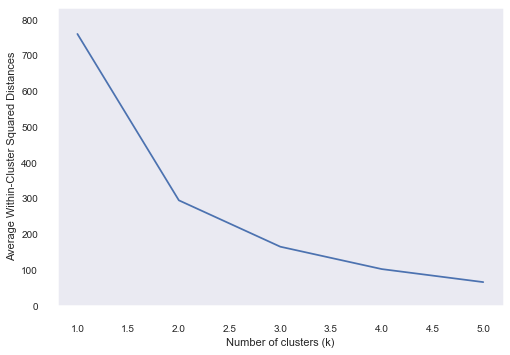

In [21]:
inertia = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
    inertia.append(kmeans.inertia_ / n_clusters)
d = {'n_clusters' : range(1, 6), 'inertia': inertia}
inertias = pd.DataFrame(data = d)
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)

In [23]:
print(kmeans)

KMeans(n_clusters=5, random_state=0)
